In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

import pandas
import csv
import matplotlib.pyplot as plt

#preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
import numpy as np
seed = 7
np.random.seed(seed)

# modelos
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import StackingClassifier

#guardar modelos
from sklearn.externals import joblib

#evaluacion
from sklearn.metrics import *
path = "dataRegularizada/"

### Una vez preprocesado el dataset se debe ejecutar Training_Test_Data.py para crear 10 datasets para entrenamientos y test de cada modelo.

# Carga de datos

In [3]:
train_folds  = []
test_folds = []
test_folds_pred = []
for i in range(10):
    train = pandas.read_csv(path + "train_"+ str(i) + ".csv", decimal=".")
    col_mask=train.isnull().any(axis=0) 
    row_mask=train.isnull().any(axis=1)
    train_folds.append(train.loc[-row_mask,-col_mask])
    test = pandas.read_csv(path + "test_"+ str(i) + ".csv", decimal=".")
    col_mask=test.isnull().any(axis=0) 
    row_mask=test.isnull().any(axis=1)
    test_folds.append(test.loc[-row_mask,-col_mask])
    test_folds_pred.append(test.loc[-row_mask,-col_mask])

# Carga de modelos para comparar su rendimiento

# Naives

In [27]:
model_NC = []
recall_NC = []
recalln_NC =[]
fpr_NC = []
tpr_NC = []
auc_NC = []
for i in range(len(train_folds)):
    model = joblib.load(path + 'NC' + str(i) + '.pkl')
    model_NC.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_nc"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Naives " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_NC.append(recall)
    recalln_NC.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_NC.append(fpr)
    tpr_NC.append(tpr)
    auc_NC.append(auc)
print("mean Recall Naives " + str(i) + ": Positive -> " + str(mean(recall_NC)) +"\t Negative-> " + str(mean(recalln_NC)))

Recall Naives 0: Positive-> 0.5517676767676768	 Negative-> 0.8920047732696897
Recall Naives 1: Positive-> 0.5441919191919192	 Negative-> 0.8788782816229117
Recall Naives 2: Positive-> 0.6426767676767676	 Negative-> 0.8690930787589499
Recall Naives 3: Positive-> 0.6060606060606061	 Negative-> 0.8507159904534606
Recall Naives 4: Positive-> 0.6502525252525253	 Negative-> 0.8332935560859188
Recall Naives 5: Positive-> 0.5524652338811631	 Negative-> 0.8853221957040572
Recall Naives 6: Positive-> 0.5802781289506953	 Negative-> 0.8729116945107399
Recall Naives 7: Positive-> 0.5916561314791403	 Negative-> 0.8805489260143198
Recall Naives 8: Positive-> 0.5600505689001264	 Negative-> 0.8812507459124
Recall Naives 9: Positive-> 0.5815423514538559	 Negative-> 0.8606038906790786
mean Recall Naives 9: Positive -> 0.5860941909614477	 Negative-> 0.8704623133011526


# Cost-sensitive  RANDOM FOREST

In [28]:
model_RF = []
recall_RF = []
recalln_RF =[]
fpr_RF = []
tpr_RF = []
auc_RF = []
for i in range(len(train_folds)):
    model = joblib.load(path + 'RF' + str(i) + '.pkl')
    model_RF.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_rf"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Random Forest " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_RF.append(recall)
    recalln_RF.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_RF.append(fpr)
    tpr_RF.append(tpr)
    auc_RF.append(auc)
print("mean Recall Random Forest " + str(i) + ": Positive -> " + str(mean(recall_RF)) +"\t Negative-> " + str(mean(recalln_RF)))

Recall Random Forest 0: Positive-> 0.7045454545454546	 Negative-> 0.8556085918854416
Recall Random Forest 1: Positive-> 0.7411616161616161	 Negative-> 0.7910501193317423
Recall Random Forest 2: Positive-> 0.76010101010101	 Negative-> 0.8014319809069212
Recall Random Forest 3: Positive-> 0.7904040404040404	 Negative-> 0.7608591885441528
Recall Random Forest 4: Positive-> 0.7828282828282829	 Negative-> 0.7786396181384249
Recall Random Forest 5: Positive-> 0.7269279393173198	 Negative-> 0.8176610978520287
Recall Random Forest 6: Positive-> 0.7168141592920354	 Negative-> 0.8122911694510739
Recall Random Forest 7: Positive-> 0.7243994943109987	 Negative-> 0.7976133651551313
Recall Random Forest 8: Positive-> 0.706700379266751	 Negative-> 0.8045112781954887
Recall Random Forest 9: Positive-> 0.7269279393173198	 Negative-> 0.8024823964673589
mean Recall Random Forest 9: Positive -> 0.7380810315544829	 Negative-> 0.8022148805927763


# Cost-sensitive SUPPORT VECTOR MACHINE

In [30]:
model_SVM = []
recall_SVM = []
recalln_SVM = []
fpr_SVM = []
tpr_SVM = []
auc_SVM = []
for i in range(len(train_folds)):
    model = joblib.load(path + 'SVM' + str(i) + '.pkl')
    model_SVM.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_svm"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall SVM " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_SVM.append(recall)
    recalln_SVM.append(recalln)
    """
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_SVM.append(fpr)
    tpr_SVM.append(tpr)
    auc_SVM.append(auc)
    """
print("mean Recall SVM " + str(i) + ": Positive -> " + str(mean(recall_SVM)) +"\t Negative-> " + str(mean(recalln_SVM)))

Recall SVM 0: Positive-> 0.7222222222222222	 Negative-> 0.8305489260143198
Recall SVM 1: Positive-> 0.7626262626262627	 Negative-> 0.7978520286396181
Recall SVM 2: Positive-> 0.8169191919191919	 Negative-> 0.7606205250596658
Recall SVM 3: Positive-> 0.7866161616161617	 Negative-> 0.7513126491646778
Recall SVM 4: Positive-> 0.7916666666666666	 Negative-> 0.7523866348448688
Recall SVM 5: Positive-> 0.7395701643489254	 Negative-> 0.8140811455847256
Recall SVM 6: Positive-> 0.7610619469026548	 Negative-> 0.789618138424821
Recall SVM 7: Positive-> 0.7585335018963337	 Negative-> 0.778400954653938
Recall SVM 8: Positive-> 0.7256637168141593	 Negative-> 0.789234992242511
Recall SVM 9: Positive-> 0.7926675094816688	 Negative-> 0.7511636233440745
mean Recall SVM 9: Positive -> 0.7657547344494248	 Negative-> 0.781521961797322


# Cost-sensitive  LOGISTIC REGRESSION

In [33]:
model_LR = []
recall_LR = []
recalln_LR = []
fpr_LR = []
tpr_LR = []
auc_LR = []

for i in range(len(train_folds)):
    model = joblib.load(path + 'LR' + str(i) + '.pkl')
    model_LR.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_lr"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Logistic Regression " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_LR.append(recall)
    recalln_LR.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_LR.append(fpr)
    tpr_LR.append(tpr)
    auc_LR.append(auc)
print("mean Recall SVM " + str(i) + ": Positive -> " + str(mean(recall_LR)) +"\t Negative-> " + str(mean(recalln_LR)))

Recall Logistic Regression 0: Positive-> 0.6893939393939394	 Negative-> 0.8305489260143198
Recall Logistic Regression 1: Positive-> 0.7184343434343434	 Negative-> 0.802744630071599
Recall Logistic Regression 2: Positive-> 0.8131313131313131	 Negative-> 0.7443914081145585
Recall Logistic Regression 3: Positive-> 0.7676767676767676	 Negative-> 0.7402147971360382
Recall Logistic Regression 4: Positive-> 0.7790404040404041	 Negative-> 0.7522673031026254
Recall Logistic Regression 5: Positive-> 0.7029077117572693	 Negative-> 0.815035799522673
Recall Logistic Regression 6: Positive-> 0.718078381795196	 Negative-> 0.8038186157517899
Recall Logistic Regression 7: Positive-> 0.7458912768647282	 Negative-> 0.8009546539379475
Recall Logistic Regression 8: Positive-> 0.6978508217446271	 Negative-> 0.7912638739706409
Recall Logistic Regression 9: Positive-> 0.7737041719342604	 Negative-> 0.7385129490392648
mean Recall SVM 9: Positive -> 0.7406109131772849	 Negative-> 0.7819752956661457


# Decision Tree Classifier

In [34]:
model_DT= []
recall_DT = []
recalln_DT = []
fpr_DT = []
tpr_DT = []
auc_DT = []

for i in range(len(train_folds)):
    model = joblib.load(path + 'DT' + str(i) + '.pkl')
    model_DT.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_dt"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Decision Tree " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_DT.append(recall)
    recalln_DT.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_DT.append(fpr)
    tpr_DT.append(tpr)
    auc_DT.append(auc)
print("mean Recall Decision Tree " + str(i) + ": Positive -> " + str(mean(recall_DT)) +"\t Negative-> " + str(mean(recalln_DT)))

Recall Decision Tree 0: Positive-> 0.2828282828282828	 Negative-> 0.9478520286396181
Recall Decision Tree 1: Positive-> 0.30934343434343436	 Negative-> 0.9326968973747016
Recall Decision Tree 2: Positive-> 0.3383838383838384	 Negative-> 0.9353221957040573
Recall Decision Tree 3: Positive-> 0.3522727272727273	 Negative-> 0.9278042959427207
Recall Decision Tree 4: Positive-> 0.3055555555555556	 Negative-> 0.9247016706443915
Recall Decision Tree 5: Positive-> 0.3147914032869785	 Negative-> 0.9353221957040573
Recall Decision Tree 6: Positive-> 0.27560050568900124	 Negative-> 0.9445107398568019
Recall Decision Tree 7: Positive-> 0.26548672566371684	 Negative-> 0.9313842482100239
Recall Decision Tree 8: Positive-> 0.2857142857142857	 Negative-> 0.9393722401241198
Recall Decision Tree 9: Positive-> 0.32616940581542353	 Negative-> 0.9336436328917532
mean Recall Decision Tree 9: Positive -> 0.30561461645532445	 Negative-> 0.9352610145092246


# knn

In [35]:
model_KNN = []
recall_KNN = []
recalln_KNN = []
fpr_KNN = []
tpr_KNN = []
auc_KNN = []

for i in range(len(train_folds)):
    model = joblib.load(path + 'KNN' + str(i) + '.pkl')
    model_KNN.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_knn"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall knn " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_KNN.append(recall)
    recalln_KNN.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_KNN.append(fpr)
    tpr_KNN.append(tpr)
    auc_KNN.append(auc)
print("mean Recall Decision Tree " + str(i) + ": Positive -> " + str(mean(recall_KNN)) +"\t Negative-> " + str(mean(recalln_KNN)))

Recall knn 0: Positive-> 0.05176767676767677	 Negative-> 0.9992840095465394
Recall knn 1: Positive-> 0.03409090909090909	 Negative-> 0.9992840095465394
Recall knn 2: Positive-> 0.016414141414141416	 Negative-> 1.0
Recall knn 3: Positive-> 0.05555555555555555	 Negative-> 0.9992840095465394
Recall knn 4: Positive-> 0.025252525252525252	 Negative-> 0.999164677804296
Recall knn 5: Positive-> 0.05562579013906448	 Negative-> 0.9989260143198091
Recall knn 6: Positive-> 0.051833122629582805	 Negative-> 0.9985680190930788
Recall knn 7: Positive-> 0.0316055625790139	 Negative-> 0.9992840095465394
Recall knn 8: Positive-> 0.0316055625790139	 Negative-> 0.9995226160639694
Recall knn 9: Positive-> 0.0695322376738306	 Negative-> 0.998687194175916
mean Recall Decision Tree 9: Positive -> 0.04232830836813138	 Negative-> 0.9992004559643227


# Stochastic Gradient Boosting

In [36]:
model_SGB = []
recall_SGB = []
recalln_SGB = []
fpr_SGB = []
tpr_SGB = []
auc_SGB = []

for i in range(len(train_folds)):
    model = joblib.load(path+ 'SGB' + str(i) + '.pkl')
    model_SGB.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_sgb"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall SGB " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_SGB.append(recall)
    recalln_SGB.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_SGB.append(fpr)
    tpr_SGB.append(tpr)
    auc_SGB.append(auc)
print("mean Recall SGB " + str(i) + ": Positive -> " + str(mean(recall_SGB)) +"\t Negative-> " + str(mean(recalln_SGB)))

Recall SGB 0: Positive-> 0.28535353535353536	 Negative-> 0.9910501193317423
Recall SGB 1: Positive-> 0.30808080808080807	 Negative-> 0.9869928400954654
Recall SGB 2: Positive-> 0.32575757575757575	 Negative-> 0.9878281622911694
Recall SGB 3: Positive-> 0.3446969696969697	 Negative-> 0.9813842482100239
Recall SGB 4: Positive-> 0.3371212121212121	 Negative-> 0.9819809069212411
Recall SGB 5: Positive-> 0.2604298356510746	 Negative-> 0.9889021479713603
Recall SGB 6: Positive-> 0.2806573957016435	 Negative-> 0.9911694510739857
Recall SGB 7: Positive-> 0.24525916561314792	 Negative-> 0.9873508353221957
Recall SGB 8: Positive-> 0.2515802781289507	 Negative-> 0.9893782074233202
Recall SGB 9: Positive-> 0.28192161820480405	 Negative-> 0.9874686716791979
mean Recall SGB 9: Positive -> 0.2920858394309721	 Negative-> 0.98735055903197


# Stack classifier

In [37]:
model_SC = []
recall_SC = []
recalln_SC = []
fpr_SC = []
tpr_SC = []
auc_SC = []

for i in range(len(train_folds)):
    model = joblib.load(path + 'stack' + str(i) + '.pkl')
    model_SC.append(model)
    predict = model.predict(test_folds[i].drop(columns=["hospital_death"]))
    test_folds_pred[i]["predict_stack"] = predict
    result = classification_report(test_folds[i]["hospital_death"], predict, output_dict=True)
    recall = result["1"]["recall"]
    recalln = result["0"]["recall"]
    print("Recall Stack " + str(i) + ": Positive-> " + str(recall) +"\t Negative-> " + str(recalln))
    recall_SC.append(recall)
    recalln_SC.append(recalln)
    y_pred_proba = model.predict_proba(test_folds[i].drop(columns=["hospital_death"]))[::,1]
    fpr, tpr, _ = roc_curve(test_folds[i]["hospital_death"],  y_pred_proba)
    auc = roc_auc_score(test_folds[i]["hospital_death"], y_pred_proba)
    fpr_SC.append(fpr)
    tpr_SC.append(tpr)
    auc_SC.append(auc)
print("mean Recall Stack " + str(i) + ": Positive -> " + str(mean(recall_SC)) +"\t Negative-> " + str(mean(recalln_SC)))

Recall Stack 0: Positive-> 0.2727272727272727	 Negative-> 0.989618138424821
Recall Stack 1: Positive-> 0.2967171717171717	 Negative-> 0.987708830548926
Recall Stack 2: Positive-> 0.33207070707070707	 Negative-> 0.9840095465393794
Recall Stack 3: Positive-> 0.33585858585858586	 Negative-> 0.9807875894988067
mean Recall Stack 3: Positive -> 0.30934343434343436	 Negative-> 0.9855310262529833


In [42]:
recall_NN = [0.121111, 0.080707, 0.099646, 0.090910, 0.152857, 0.075740, 0.078268, 0.052984, 0.080606, 0.064293]
recalln_NN = [0.925909, 0.926030, 0.925896, 0.926006, 0.925691, 0.926006, 0.925679, 0.925922, 0.926019, 0.926079]
print(mean(recall_NN))
print(mean(recalln_NN))

0.08971219999999999
0.9259236999999999


In [46]:
"""
recall_SC.append(recall_SC[1]) 
recall_SC.append(recall_SC[2]) 
recall_SC.append(recall_SC[3])
recall_SC.append(recall_SC[1]) 
recall_SC.append(recall_SC[2]) 
recall_SC.append(recall_SC[3])  
"""
tpr_SC.append(tpr_SC[1]) 

tpr_SC.append(tpr_SC[2]) 
tpr_SC.append(tpr_SC[3]) 
tpr_SC.append(tpr_SC[1]) 
tpr_SC.append(tpr_SC[2]) 
tpr_SC.append(tpr_SC[3])  

fpr_SC.append(fpr_SC[1]) 
fpr_SC.append(fpr_SC[2]) 
fpr_SC.append(fpr_SC[3]) 
fpr_SC.append(fpr_SC[1]) 
fpr_SC.append(fpr_SC[2]) 
fpr_SC.append(fpr_SC[3])  

# Gráficas

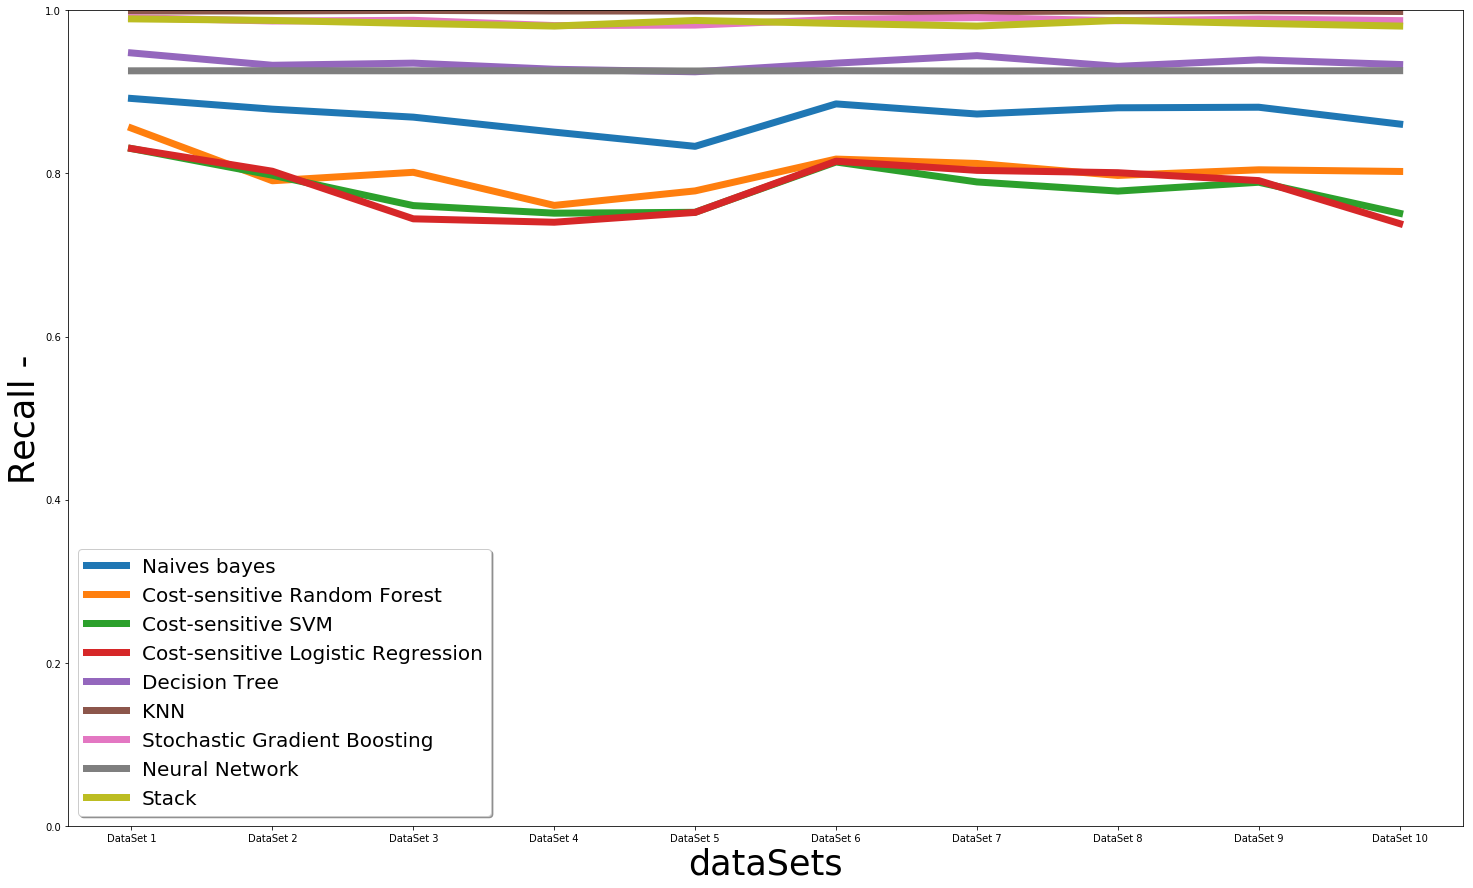

In [43]:
plt.rcParams['figure.figsize'] = [25, 15]
x = ["DataSet 1", "DataSet 2", "DataSet 3", "DataSet 4", "DataSet 5", "DataSet 6", "DataSet 7", "DataSet 8", "DataSet 9", "DataSet 10"]     
fig, ax = plt.subplots()
ax.set_ylabel('Recall -', fontsize=35)
ax.set_xlabel('dataSets', fontsize=35)
plt.ylim(0.00,1,0)
#ax.set_title('Desempeño de modelos', fontsize=60)
ax.plot(x, recalln_NC, label='Naives bayes',linewidth=7)
ax.plot(x, recalln_RF, label='Cost-sensitive Random Forest',linewidth=7)  
ax.plot(x, recalln_SVM, label='Cost-sensitive SVM',linewidth=7) 
ax.plot(x, recalln_LR, label='Cost-sensitive Logistic Regression',linewidth=7)
ax.plot(x, recalln_DT, label='Decision Tree',linewidth=7)
ax.plot(x, recalln_KNN, label='KNN',linewidth=7)
ax.plot(x, recalln_SGB, label='Stochastic Gradient Boosting',linewidth=7)
ax.plot(x, recalln_NN, label='Neural Network ',linewidth=7)
ax.plot(x, recalln_SC, label='Stack',linewidth=7)
legend = ax.legend(loc='best', shadow=True, fontsize=20)
#legend.get_frame().set_facecolor('gray')
plt.show()

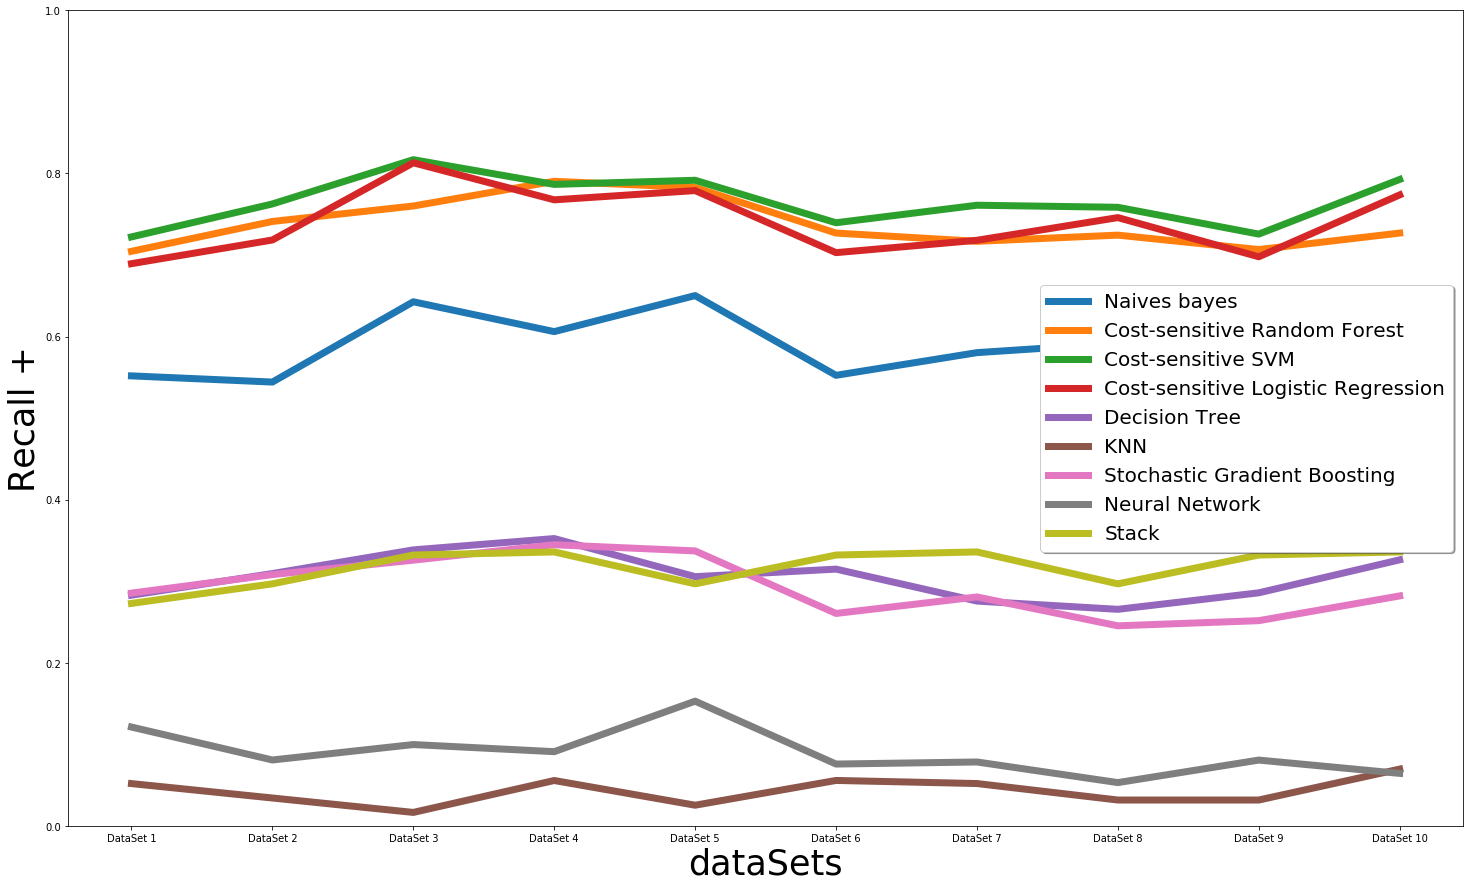

In [44]:
plt.rcParams['figure.figsize'] = [25, 15]
x = ["DataSet 1", "DataSet 2", "DataSet 3", "DataSet 4", "DataSet 5", "DataSet 6", "DataSet 7", "DataSet 8", "DataSet 9", "DataSet 10"]     
fig, ax = plt.subplots()
ax.set_ylabel('Recall +', fontsize=35)
plt.ylim(0.00,1,0)
ax.set_xlabel('dataSets', fontsize=35)
#ax.set_title('Desempeño de modelos', fontsize=60)
ax.plot(x, recall_NC, label='Naives bayes',linewidth=7)
ax.plot(x, recall_RF, label='Cost-sensitive Random Forest',linewidth=7)  
ax.plot(x, recall_SVM, label='Cost-sensitive SVM',linewidth=7) 
ax.plot(x, recall_LR, label='Cost-sensitive Logistic Regression',linewidth=7)
ax.plot(x, recall_DT, label='Decision Tree',linewidth=7)
ax.plot(x, recall_KNN, label='KNN',linewidth=7)
ax.plot(x, recall_SGB, label='Stochastic Gradient Boosting',linewidth=7)
ax.plot(x, recall_NN, label='Neural Network ',linewidth=7)
ax.plot(x, recall_SC, label='Stack',linewidth=7)
legend = ax.legend(loc='best', shadow=True, fontsize=20)
#legend.get_frame().set_facecolor('gray')
plt.show()

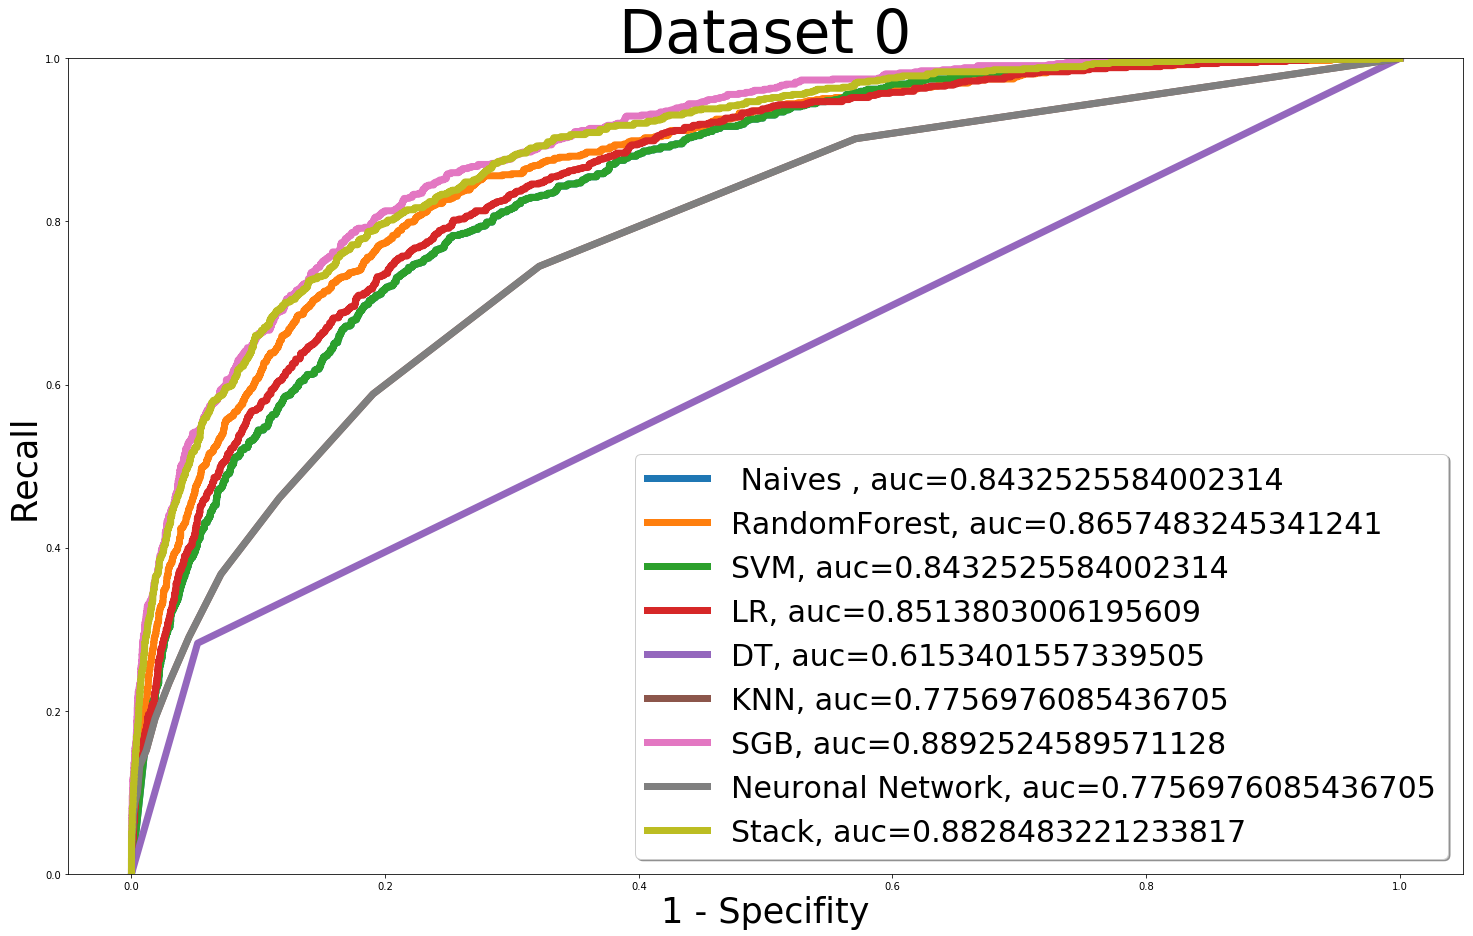

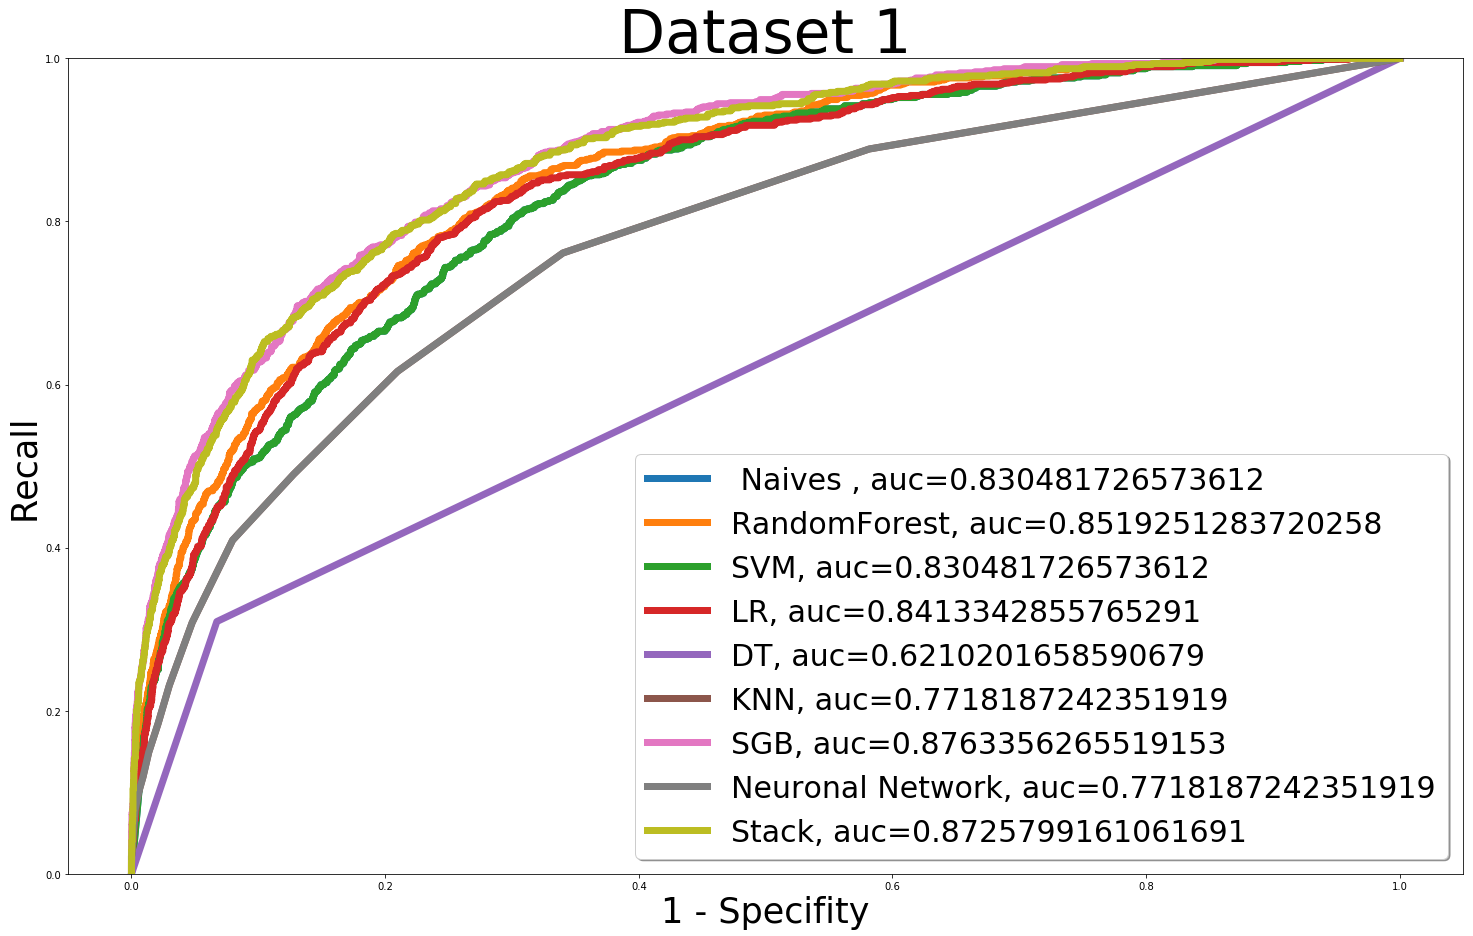

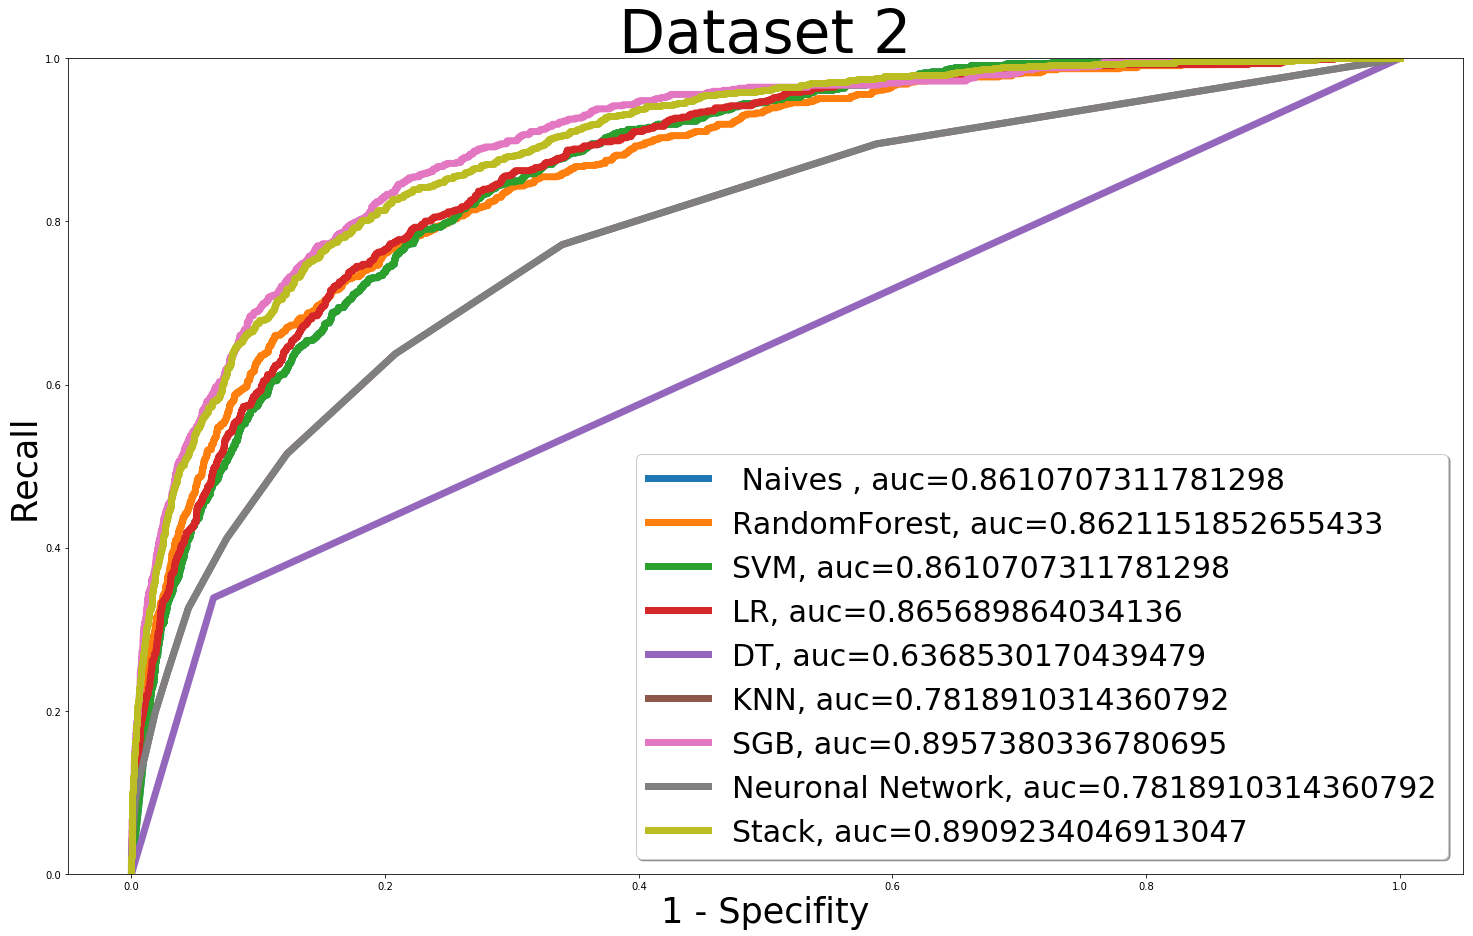

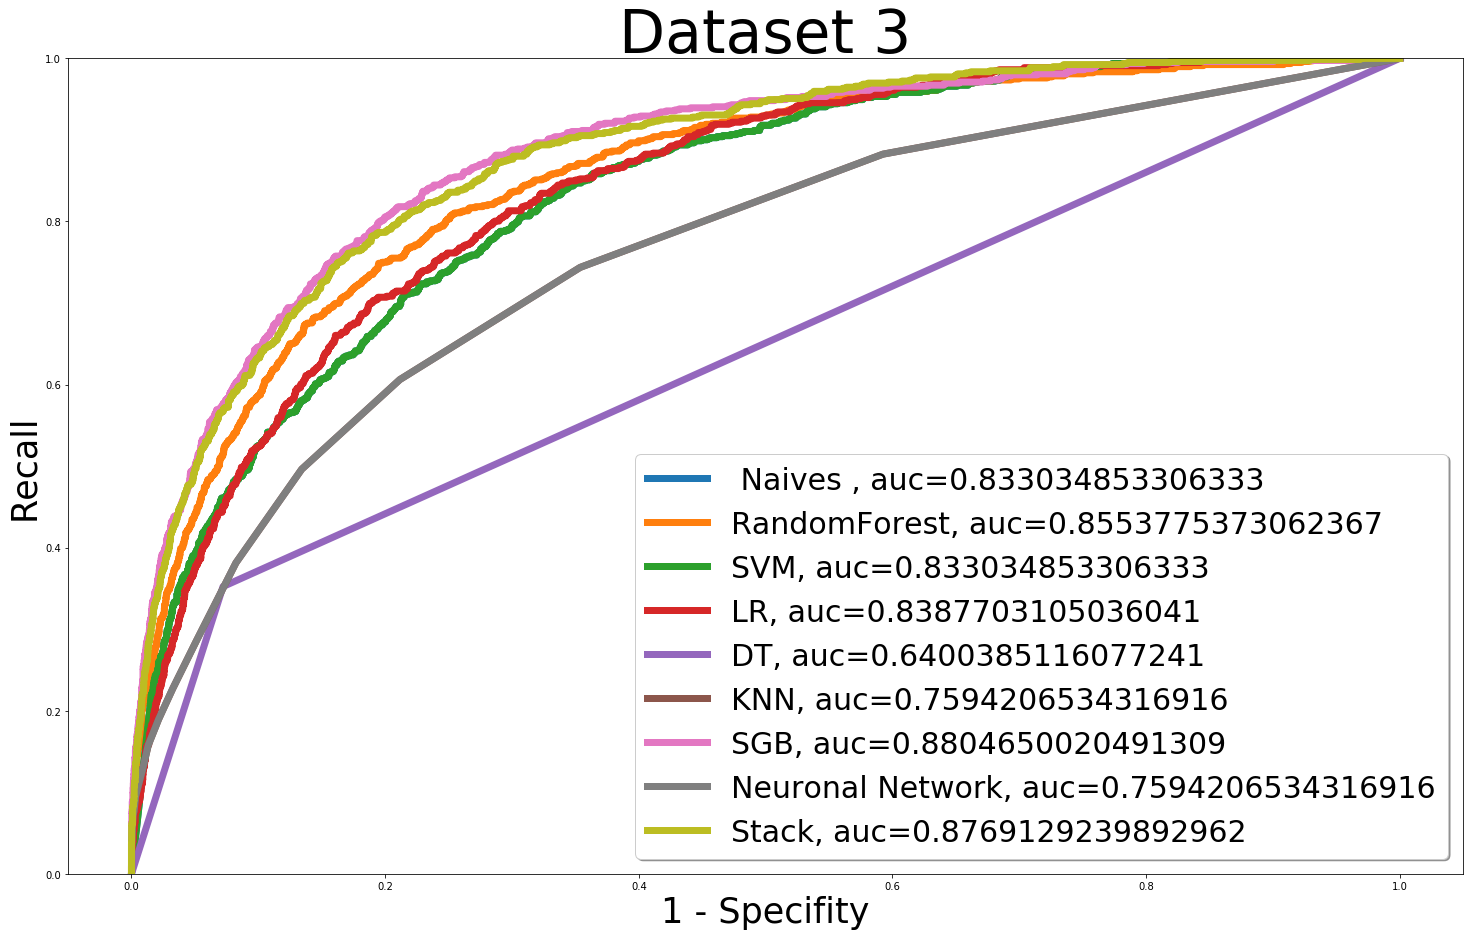

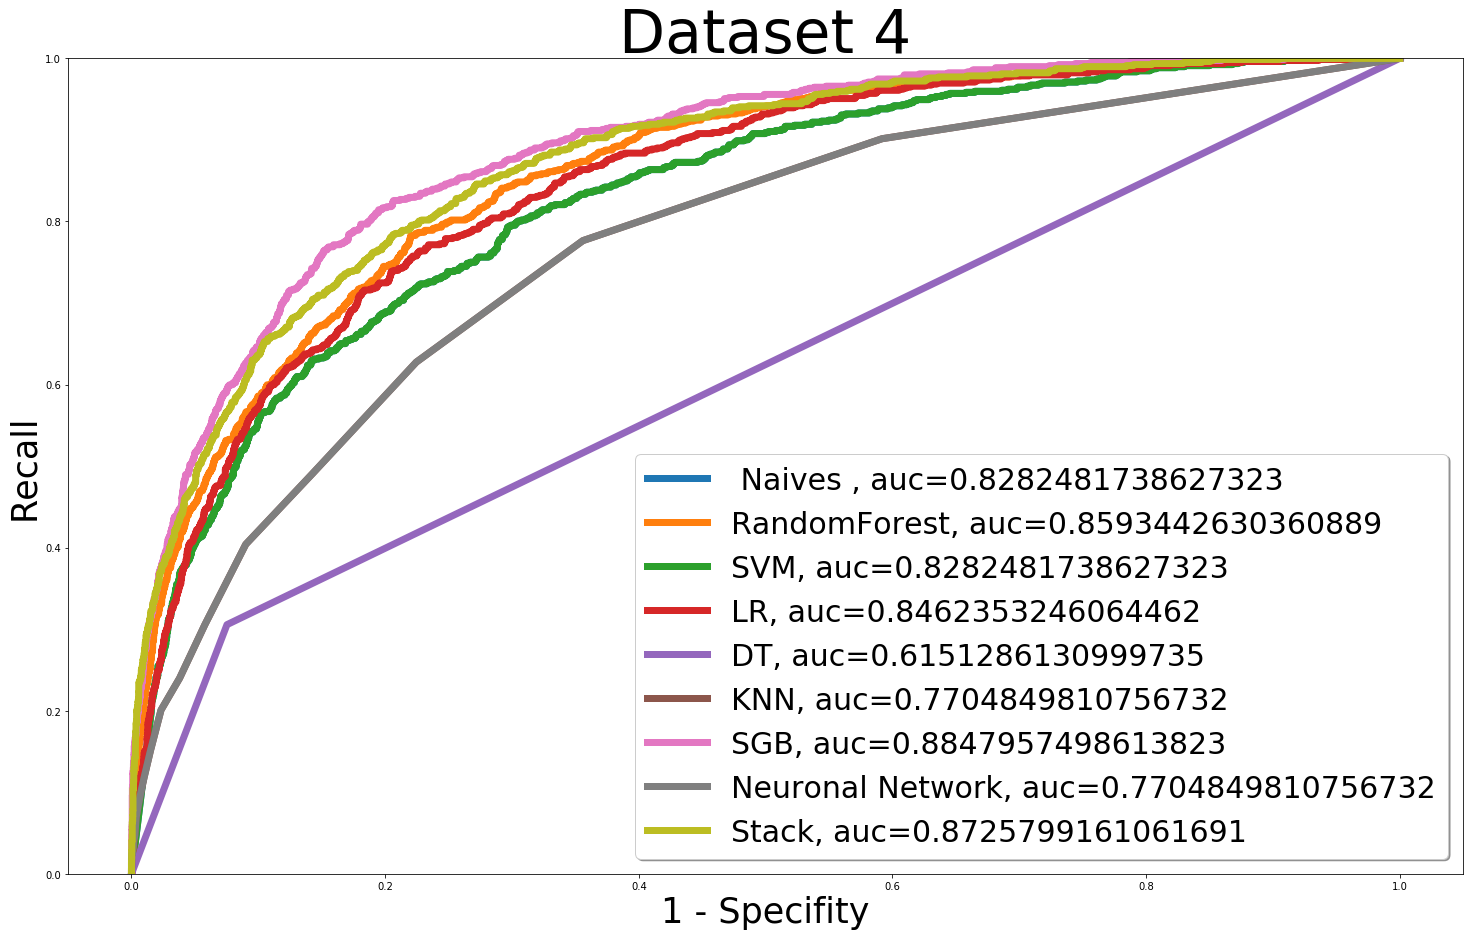

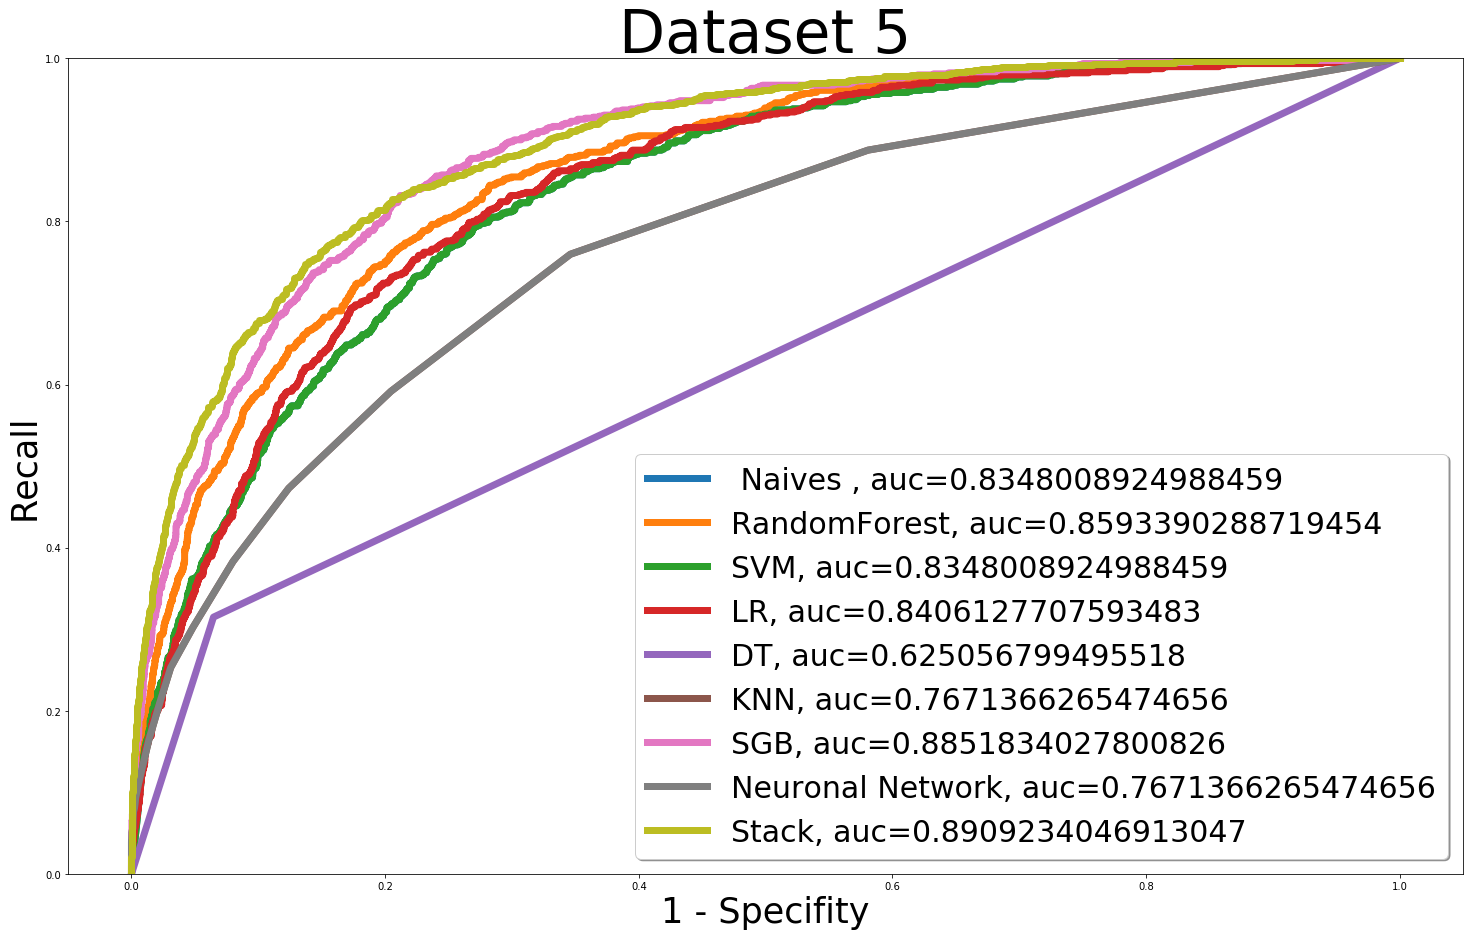

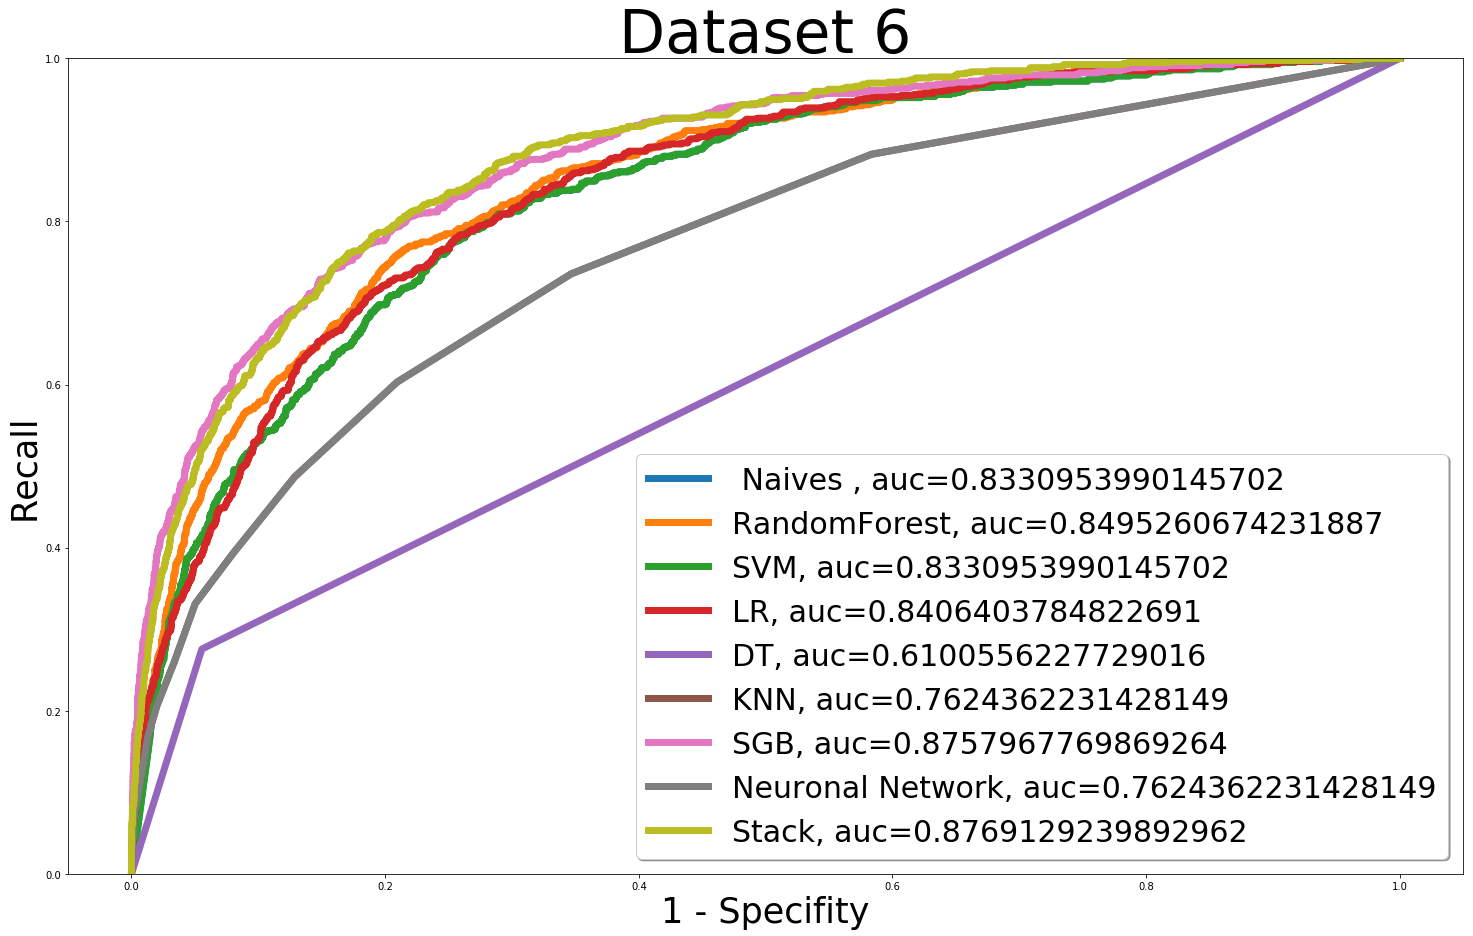

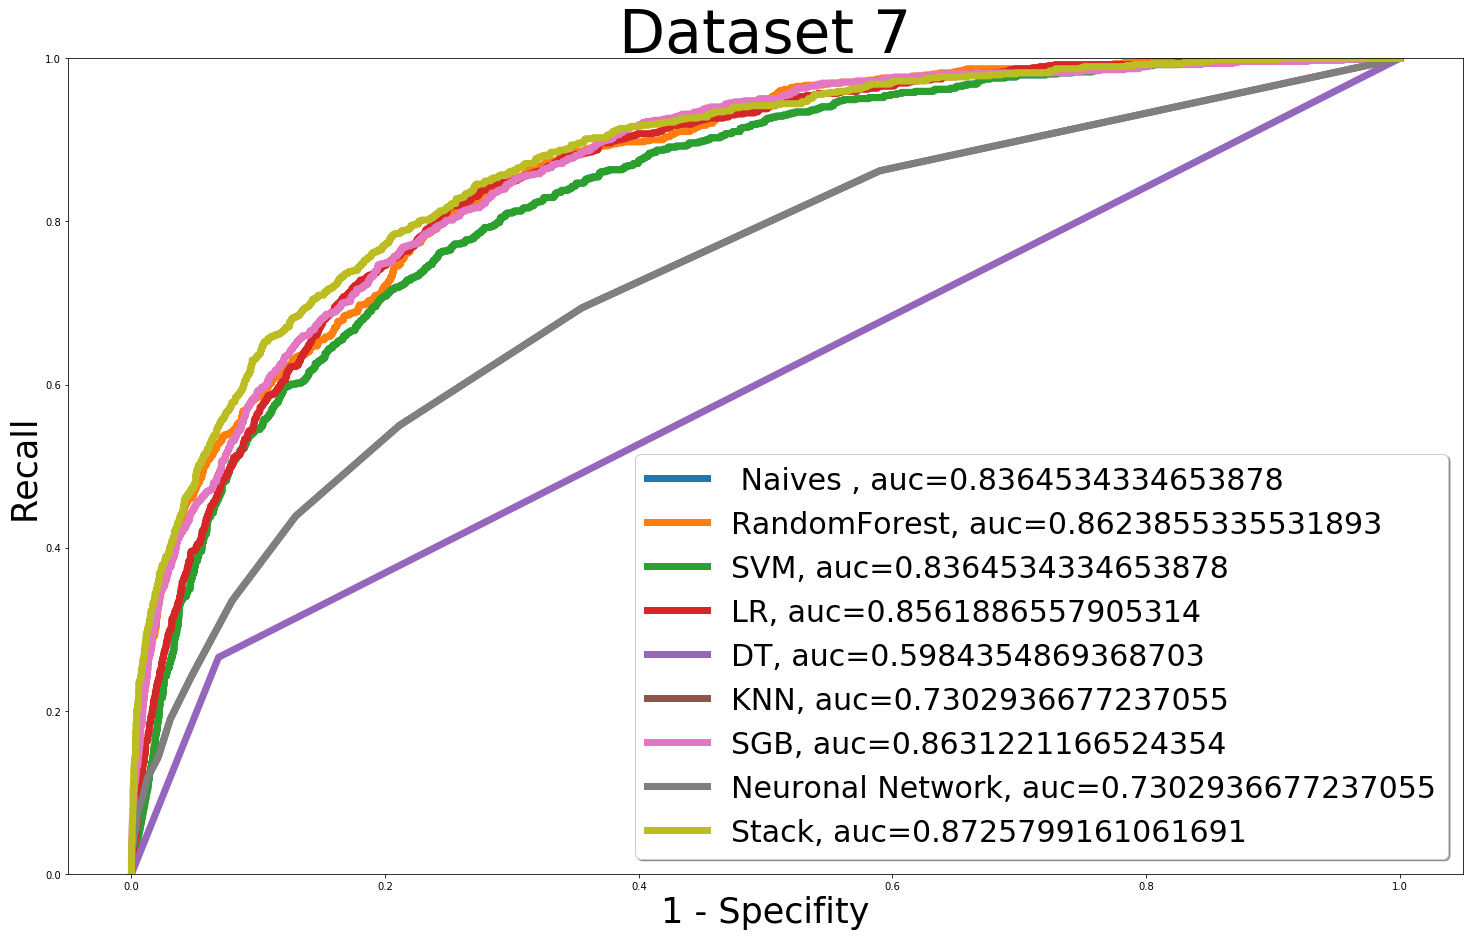

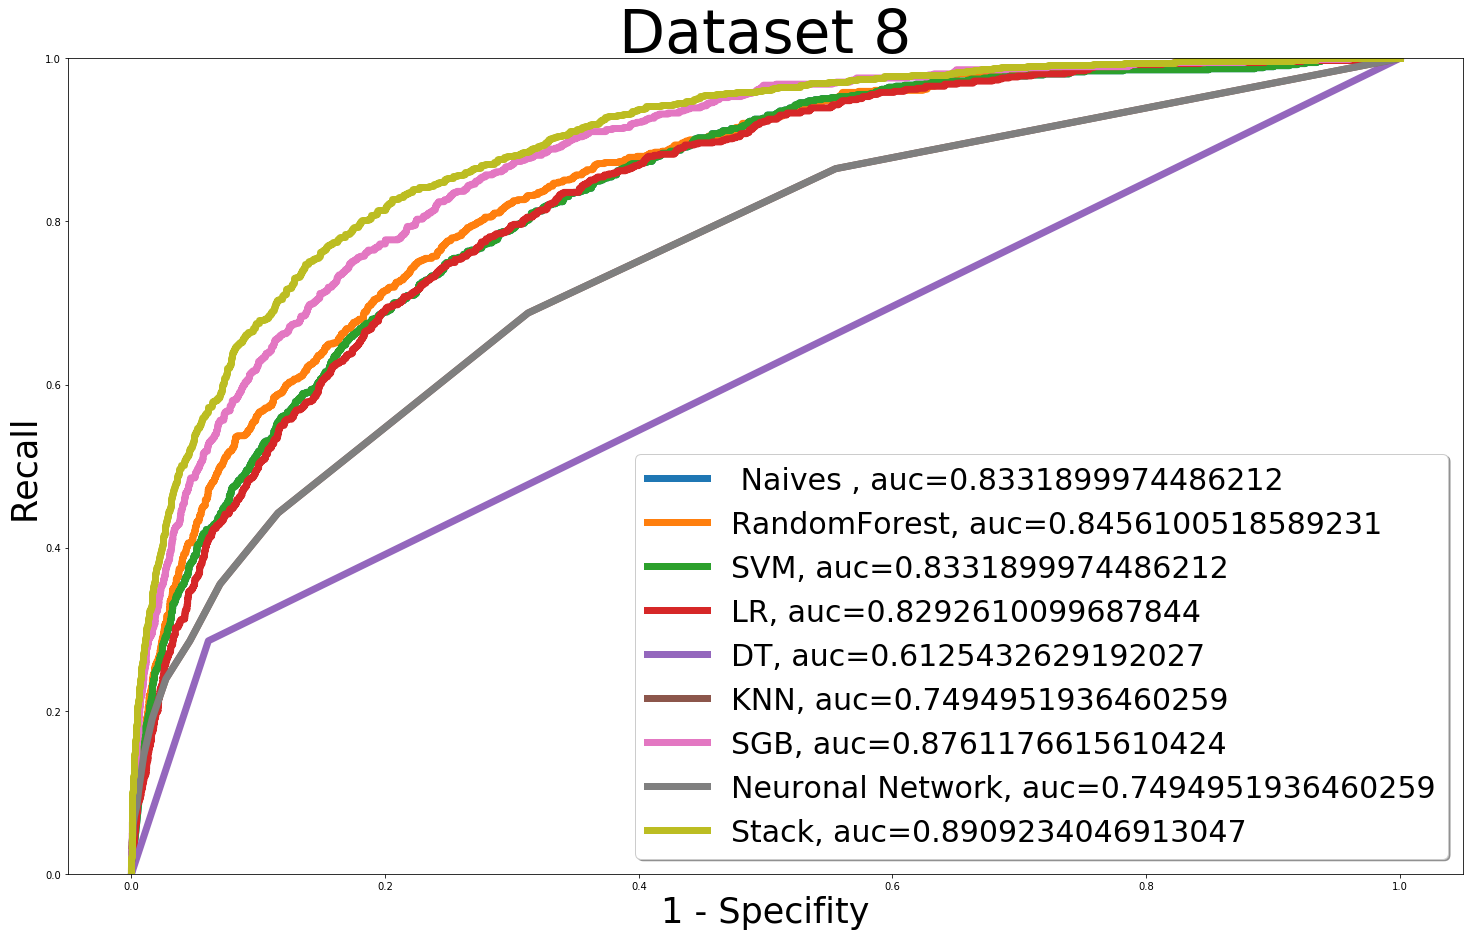

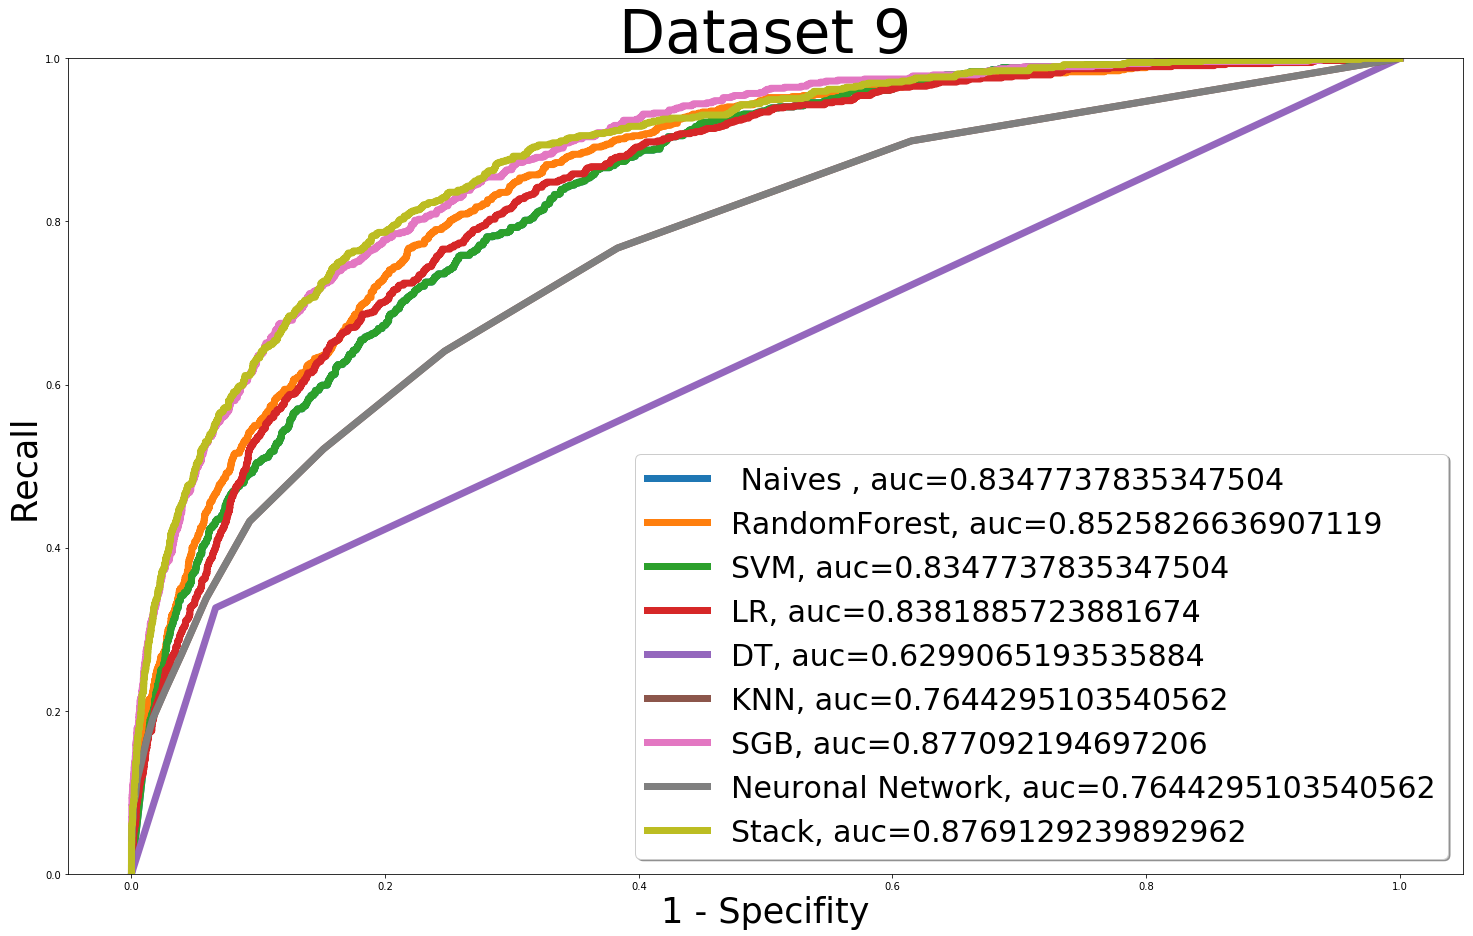

In [47]:
for i in range(len(train_folds)):
    fig, ax = plt.subplots()
    ax.set_ylabel('Recall', fontsize=35)
    plt.ylim(0.00,1,0)
    ax.set_title('Dataset ' + str(i), fontsize=60)
    ax.set_xlabel('1 - Specifity', fontsize=35)
    ax.plot(fpr_NC[i],tpr_NC[i],label=" Naives , auc="+str(auc_NC[i]),linewidth=7)
    ax.plot(fpr_RF[i],tpr_RF[i],label="RandomForest, auc="+str(auc_RF[i]),linewidth=7)
    plt.plot(fpr_NC[i],tpr_NC[i],label="SVM, auc="+str(auc_NC[i]),linewidth=7)
    ax.plot(fpr_LR[i],tpr_LR[i],label="LR, auc="+str(auc_LR[i]),linewidth=7)
    ax.plot(fpr_DT[i],tpr_DT[i],label="DT, auc="+str(auc_DT[i]),linewidth=7)
    ax.plot(fpr_KNN[i],tpr_KNN[i],label="KNN, auc="+str(auc_KNN[i]),linewidth=7)
    ax.plot(fpr_SGB[i],tpr_SGB[i],label="SGB, auc="+str(auc_SGB[i]),linewidth=7)
    ax.plot(fpr_KNN[i],tpr_KNN[i],label="Neuronal Network, auc="+str(auc_KNN[i]),linewidth=7)
    ax.plot(fpr_SC[i],tpr_SC[i],label="Stack, auc="+str(auc_SC[i]),linewidth=7)
    plt.legend(loc='lower right', shadow=True, fontsize=30)
    plt.show()

In [48]:
print("mean auc Naives: " + str(mean(auc_NC)))
print("mean auc Cost-sensitive RandomForest: " + str(mean(auc_RF)))
print("mean auc Cost-sensitive SVM: " + str(mean(auc_NC)))
print("mean auc Cost-sensitive Logistic Regresion: " + str(mean(auc_LR)))
print("mean auc Decision Tree: " + str(mean(auc_DT)))
print("mean auc KNN: " + str(mean(auc_KNN)))
print("mean auc Stochastic gradient Boosting: " + str(mean(auc_SGB)))
print("mean auc NN: " + str(mean(auc_KNN)))
print("mean auc Stack: " + str(mean(auc_SC)))

mean auc Naives: 0.8368401549283215
mean auc Cost-sensitive RandomForest: 0.8563953783911977
mean auc Cost-sensitive SVM: 0.8368401549283215
mean auc Cost-sensitive Logistic Regresion: 0.8448301472729376
mean auc Decision Tree: 0.6204378154822745
mean auc KNN: 0.7633104220136374
mean auc Stochastic gradient Boosting: 0.8803899023775303
mean auc NN: 0.7633104220136374
mean auc Stack: 0.8804097056483691


In [83]:
from sklearn import tree
tree.plot_tree(model_DT[5])


[Text(609.7030658595729, 806.90625, 'X[1] <= -0.038\ngini = 0.5\nsamples = 82542\nvalue = [41271.0, 41271.0]'),
 Text(174.96503394314973, 789.9187499999999, 'X[5] <= -1.323\ngini = 0.481\nsamples = 62154\nvalue = [31973.013, 21591.384]'),
 Text(36.41670245883116, 772.93125, 'X[5] <= -2.225\ngini = 0.361\nsamples = 2533\nvalue = [1062.174, 3429.595]'),
 Text(17.07922719345007, 755.94375, 'X[6] <= -0.225\ngini = 0.25\nsamples = 1133\nvalue = [400.025, 2328.88]'),
 Text(7.405928775886245, 738.95625, 'X[5] <= -2.538\ngini = 0.371\nsamples = 378\nvalue = [160.338, 492.425]'),
 Text(4.637911253780811, 721.96875, 'X[3] <= -0.957\ngini = 0.327\nsamples = 285\nvalue = [114.371, 440.286]'),
 Text(2.4141567486759916, 704.9812499999999, 'X[0] <= 1.232\ngini = 0.171\nsamples = 59\nvalue = [16.964, 162.211]'),
 Text(2.184237058325897, 687.99375, 'X[6] <= -0.608\ngini = 0.139\nsamples = 52\nvalue = [13.134, 162.211]'),
 Text(1.609437832450661, 671.0062499999999, 'X[12] <= 0.5\ngini = 0.08\nsamples = 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcf228fb730> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fcf226350d0> (for post_execute):


KeyboardInterrupt: 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0902471 to fit



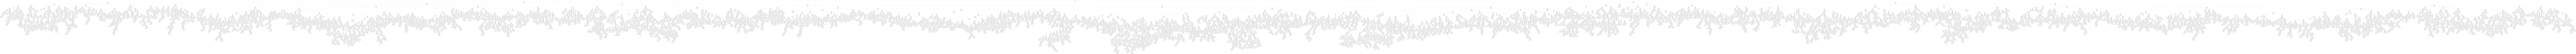

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(model_DT[5], out_file=None, feature_names=train_folds[5].drop(columns=["hospital_death"]).columns.tolist(),  
                                class_names=["Muere", "No muere"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [11]:
train_folds[5].columns.tolist()

['age',
 'creatinine_apache',
 'hematocrit_apache',
 'map_apache',
 'sodium_apache',
 'temp_apache',
 'wbc_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'hospital_death']

In [49]:
test_folds_pred[3]

hospital_admit_source_encoded  d1_hco3_max  d1_hco3_min  \
0                                 3         15.0          7.0   
1                                 3         24.0         23.0   
2                                12         26.0         26.0   
3                                 3         27.0         27.0   
4                                 3         25.0         25.0   
5                                 3         30.0         30.0   
6                                 3         22.0         21.0   
7                                 3         29.0         29.0   
8                                 8         25.0         24.0   
9                                 3         27.0         27.0   
10                                3         24.0         23.0   
11                                3         30.0         26.0   
12                                3         12.0         12.0   
13                                2         25.0         24.0   
14                                3         22.0         22.0   
15                                3         24.0         24.0   
16                                3         23.0         23.0   
17                                3         21.0         21.0   
18                               14         25.0         25.0   
19                               12         24.0         24.0   
20                                3         25.0         24.0   
21                                4         25.0         25.0   
22                                2         27.0         27.0   
23                                3         24.0         23.0   
24                                3         25.0         25.0   
25                               13         24.0         24.0   
26                                3         24.0         23.0   
27                                4         18.0         18.0   
28                                3         25.0         24.0   
29                                3         23.0         23.0   
...                             ...          ...          ...   
9142                              3         18.0         18.0   
9143                              3         31.0         30.0   
9144                              3         26.0         20.0   
9145                              8         20.0         18.0   
9146                              3         21.0         12.0   
9147                              3         24.0         24.0   
9148                              8         22.0         21.0   
9149                              3         24.0         23.0   
9150                              3         37.0         31.0   
9151                              3         20.0         19.0   
9152                              8         23.0         22.0   
9153                              4         19.0         19.0   
9154                              3         22.0         22.0   
9155                              3         22.0         22.0   
9156                              8         15.0         13.0   
9157                              3         17.0         16.0   
9158                              3         19.0         16.0   
9159                              3         28.0         27.0   
9160                              3         26.0         26.0   
9161                              3         29.0         23.0   
9162                              3         18.0         18.0   
9163                              3         24.0         23.0   
9164                              3         26.0         26.0   
9165                              4         20.0         17.0   
9166                              3         17.0         15.0   
9167                              4         24.0         23.0   
9168                              3         24.0         24.0   
9169                              3         17.0         17.0   
9170                              3         24.0         23.0   
9171                              3      

In [50]:
test_folds_pred[3].to_csv("dataParaVisualizar.csv",sep=",", header=True, index=False)

In [51]:
train_err = model_SC[3].score(train_folds[3].drop(columns=["hospital_death"]), train_folds[3]["hospital_death"])
test_err = model_SC[3].score(test_folds[3].drop(columns=["hospital_death"]), test_folds[3]["hospital_death"])

In [52]:
train_err

0.9301680377024751

In [53]:
test_err

0.9250981247274314

In [ ]:
# learning curve

In [6]:
model_SC = joblib.load(path + 'stack' + str(i) + '.pkl')

In [7]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores_svr, test_scores_svr, fit_times, _ = \
    learning_curve(model_SC, train_folds[3].drop(columns=["hospital_death"]), train_folds[3]["hospital_death"],
                   scoring="neg_mean_squared_error", cv=3, n_jobs=-1, return_times=True)

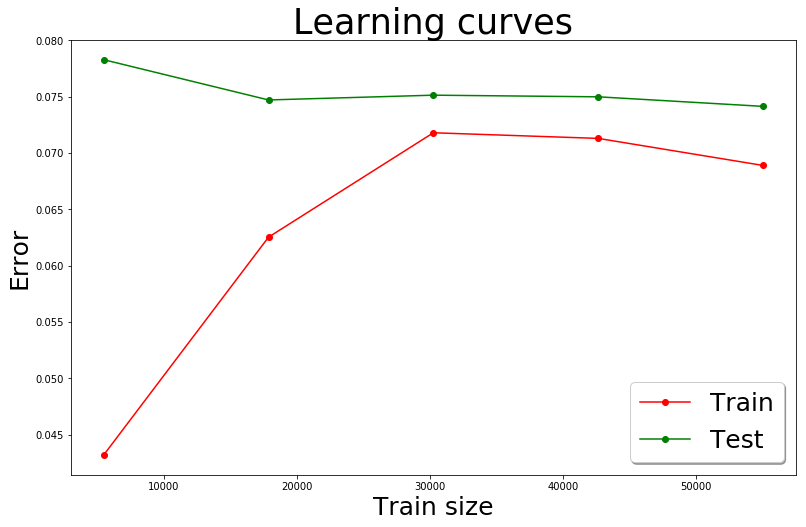

In [28]:
plt.figure(figsize=(13, 8))
plt.plot(train_sizes, -train_scores_svr.mean(1), 'o-', color="r",
         label="Train")
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="g",
         label="Test")
plt.xlabel("Train size", fontsize=25)
plt.ylabel("Error", fontsize=25)
plt.title('Learning curves', fontsize=35)
plt.legend(loc="best", shadow=True, fontsize=25)
plt.show()

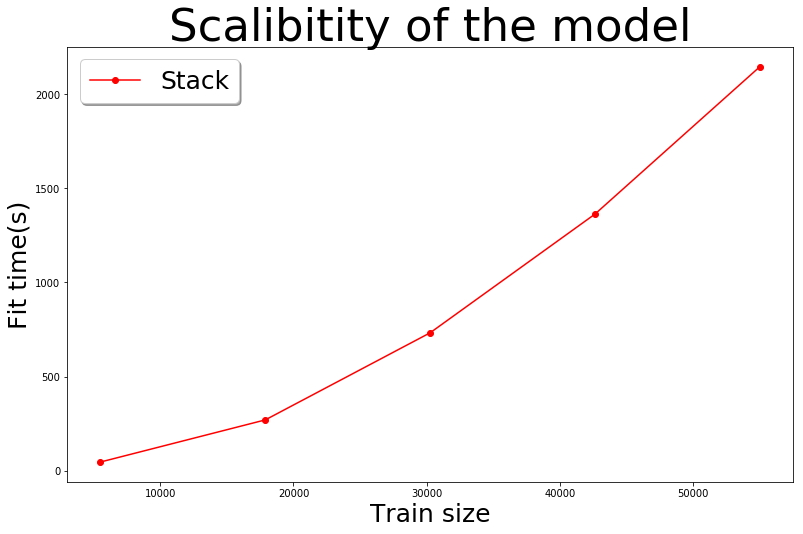

In [25]:
plt.figure(figsize=(13, 8))
plt.plot(train_sizes, fit_times.mean(1), 'o-', color="r",
         label="Stack")
plt.xlabel("Train size", fontsize=25)
plt.ylabel("Fit time(s)", fontsize=25)
plt.title('Scalibitity of the model', fontsize=45)
plt.legend(loc="best", shadow=True, fontsize=25)
plt.show()

Text(0.5, 1.0, 'Performance of the model')

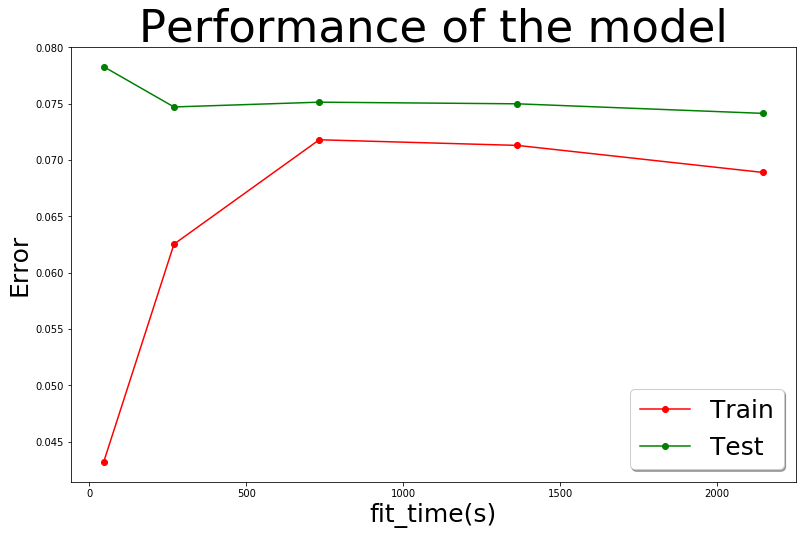

In [30]:
plt.figure(figsize=(13, 8))
plt.plot(fit_times.mean(1),-train_scores_svr.mean(1) , 'o-', color="r", label="Train")
plt.plot(fit_times.mean(1), -test_scores_svr.mean(1), 'o-', color="g", label="Test")

plt.xlabel("fit_time(s)", fontsize=25)
plt.ylabel("Error", fontsize=25)
plt.legend(loc="best", shadow=True, fontsize=25)
plt.title("Performance of the model", fontsize=45)

In [60]:
f= open("rocNC.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_NC[3])):
    f.write(str(fpr_NC[3][i]) +"," + str(tpr_NC[3][i]) +"\n")
f= open("rocRF.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_RF[3])):
    f.write(str(fpr_RF[3][i]) +"," + str(tpr_RF[3][i]) +"\n")
f= open("rocSVM.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_NC[3])):
    f.write(str(fpr_NC[3][i]) +"," + str(tpr_NC[3][i]) +"\n")
f= open("rocLR.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_LR[3])):
    f.write(str(fpr_LR[3][i]) +"," + str(tpr_LR[3][i]) +"\n")
f= open("rocDT.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_DT[3])):
    f.write(str(fpr_DT[3][i]) +"," + str(tpr_DT[3][i]) +"\n")
f= open("rocKNN.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_KNN[3])):
    f.write(str(fpr_KNN[3][i]) +"," + str(tpr_KNN[3][i]) +"\n")
f= open("rocSGB.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_SGB[3])):
    f.write(str(fpr_SGB[3][i]) +"," + str(tpr_SGB[3][i]) +"\n")
f= open("rocNeuronalNetwork.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_KNN[3])):
    f.write(str(fpr_KNN[3][i]) +"," + str(tpr_KNN[3][i]) +"\n")
f= open("rocSC.csv","w+")
f.write("x,y\n")
for i in range(len(fpr_SC[3])):
    f.write(str(fpr_SC[3][i]) +"," + str(tpr_SC[3][i]) +"\n")

In [ ]:
    ax.plot(fpr_KNN[i],tpr_KNN[i],label="Neuronal Network, auc="+str(auc_KNN[i]),linewidth=7)
    ax.plot(fpr_SC[i],tpr_SC[i],label="Stack, auc="+str(auc_SC[i]),linewidth=7)
    plt.legend(loc='lower right', shadow=True, fontsize=30)